## Exploratory Data Analysis of WHO Suicide Statistics

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

suicides = pd.read_csv('WHO_suicide_statistics.csv', sep = ',')

suicides.head()



,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [21]:
suicides.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [87]:
suicides.age.values

array(['15-24 years', '25-34 years', '35-54 years', ..., '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [22]:
suicides.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [23]:
suicides.dtypes


country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [24]:
suicides.shape

(43776, 6)

In [19]:
suicides["suicides_pc"]= (suicides.suicides_no / suicides.population) * 100

#suicides.age.replace('15-24 years', 'Youth', inplace=True)
#suicides.age.replace('25-34 years','Adult', inplace=True)
#suicides.age.replace('35-54 years', 'Adult', inplace=True)
#suicides.age.replace('55-74 years', 'Elderly', inplace=True)
#suicides.age.replace('75+ years', 'Elderly', inplace=True)




## Filtering for data on Singapore

In [25]:
mask=suicides.country == "Singapore"
suicides_singapore=suicides[mask]
suicides_singapore.head()

,country,year,sex,age,suicides_no,population
35172,Singapore,1979,female,15-24 years,31.0,275600.0
35173,Singapore,1979,female,25-34 years,25.0,204900.0
35174,Singapore,1979,female,35-54 years,20.0,227100.0
35175,Singapore,1979,female,5-14 years,4.0,230100.0
35176,Singapore,1979,female,55-74 years,18.0,107800.0


In [26]:
suicides_singapore.groupby("year").suicides_no.sum()

year
1979    246.0
1980    269.0
1981    190.0
1982    238.0
1983    267.0
1984    211.0
1985    324.0
1986    326.0
1987    301.0
1988    366.0
1989    394.0
1990    354.0
1991    296.0
1992    277.0
1993    270.0
1994    316.0
1995    364.0
1996    239.0
1997    303.0
1998    328.0
1999    277.0
2000    309.0
2001    305.0
2002    321.0
2003    320.0
2004    335.0
2005    359.0
2006    372.0
2007    328.0
2008    319.0
2009    349.0
2010    296.0
2011    308.0
2012    392.0
2013    357.0
2014    355.0
2015    329.0
Name: suicides_no, dtype: float64

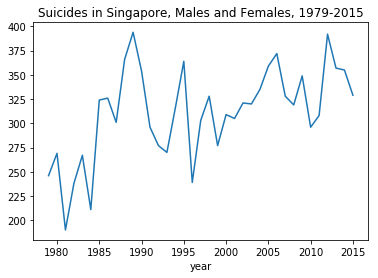

In [58]:
suicides_singapore.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males and Females, 1979-2015")

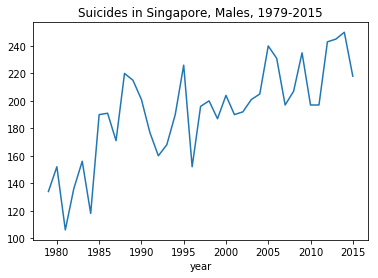

In [55]:
suicides_singapore[suicides_singapore['sex'] == "male"].groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males, 1979-2015")

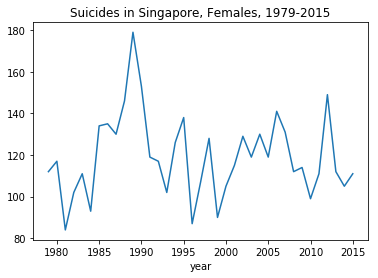

In [56]:
suicides_singapore[suicides_singapore['sex'] == "female"].groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Females, 1979-2015")

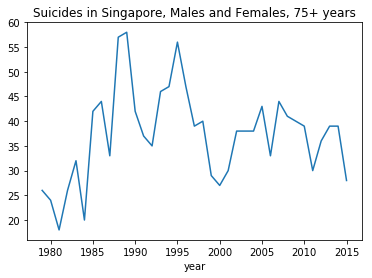

In [57]:
suicides_singapore[suicides_singapore['age'] == "75+ years"].groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males and Females, 75+ years")

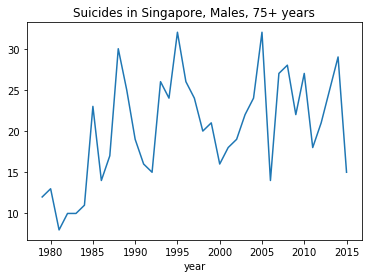

In [62]:
suicides_sgmales_elderly=pd.DataFrame(suicides_singapore[(suicides_singapore.sex == 'male') & (suicides_singapore.age == "75+ years")])
suicides_sgmales_elderly.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males, 75+ years")

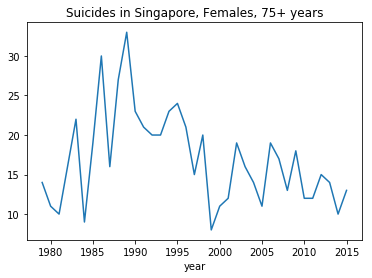

In [61]:
suicides_sgfemales_elderly=pd.DataFrame(suicides_singapore[(suicides_singapore.sex == 'female') & (suicides_singapore.age == "75+ years")])
suicides_sgfemales_elderly.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Females, 75+ years")

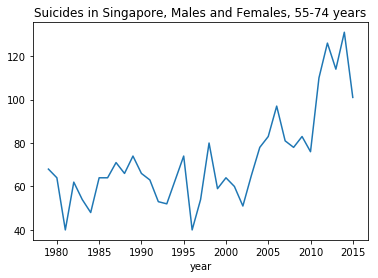

In [63]:
suicides_singapore[suicides_singapore['age'] == "55-74 years"].groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males and Females, 55-74 years")

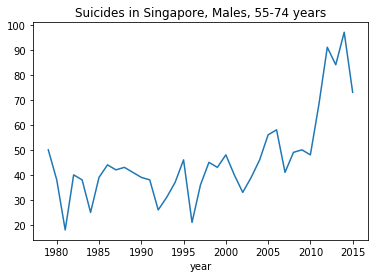

In [64]:
suicides_sgmales_seniors=pd.DataFrame(suicides_singapore[(suicides_singapore.sex == 'male') & (suicides_singapore.age == "55-74 years")])
suicides_sgmales_seniors.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males, 55-74 years")

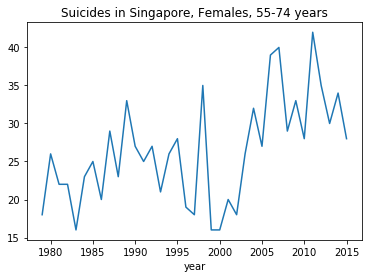

In [65]:
suicides_sgfemales_seniors=pd.DataFrame(suicides_singapore[(suicides_singapore.sex == 'female') & (suicides_singapore.age == "55-74 years")])
suicides_sgfemales_seniors.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Females, 55-74 years")

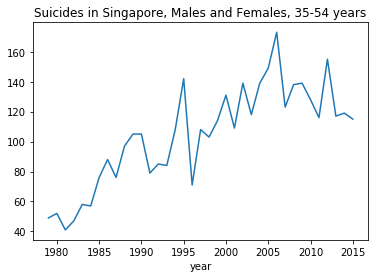

In [66]:
suicides_singapore[suicides_singapore['age'] == "35-54 years"].groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males and Females, 35-54 years")

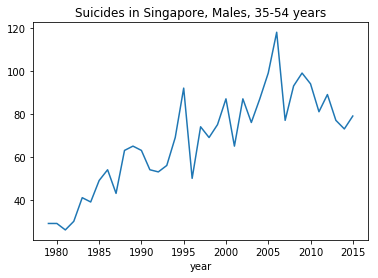

In [71]:
suicides_sgmales_adults=pd.DataFrame(suicides_singapore[(suicides_singapore.sex == 'male') & (suicides_singapore.age == "35-54 years")])
suicides_sgmales_adults.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males, 35-54 years")

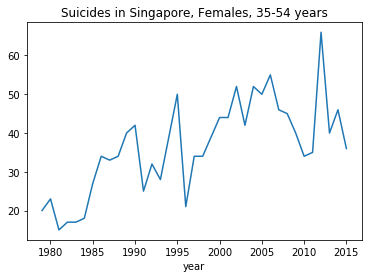

In [72]:
suicides_sgfemales_adults=pd.DataFrame(suicides_singapore[(suicides_singapore.sex == 'female') & (suicides_singapore.age == "35-54 years")])
suicides_sgfemales_adults.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Females, 35-54 years")

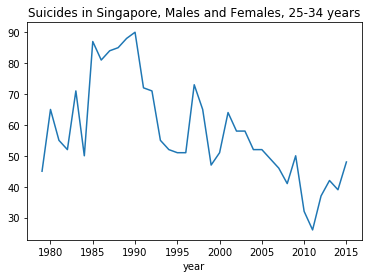

In [67]:
suicides_singapore[suicides_singapore['age'] == "25-34 years"].groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males and Females, 25-34 years")

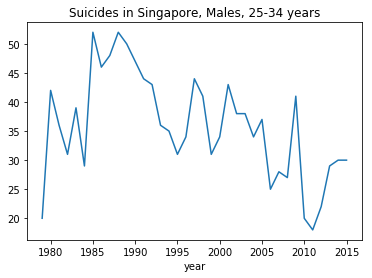

In [77]:
suicides_sgmales_youngadults=suicides_singapore[(suicides_singapore.sex == 'male') & (suicides_singapore.age == "25-34 years")]
suicides_sgmales_youngadults.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males, 25-34 years")

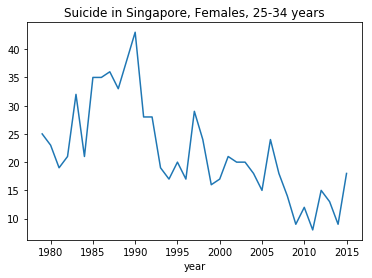

In [78]:
suicides_sgfemales_youngadults=suicides_singapore[(suicides_singapore.sex == 'female') & (suicides_singapore.age == "25-34 years")]
suicides_sgfemales_youngadults.groupby("year").suicides_no.sum().plot(kind="line", title="Suicide in Singapore, Females, 25-34 years")

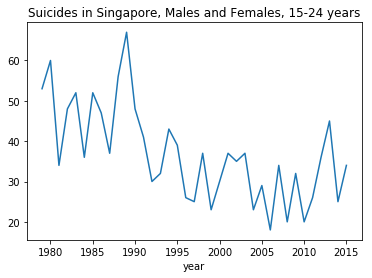

In [68]:
suicides_singapore[suicides_singapore['age'] == "15-24 years"].groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males and Females, 15-24 years")

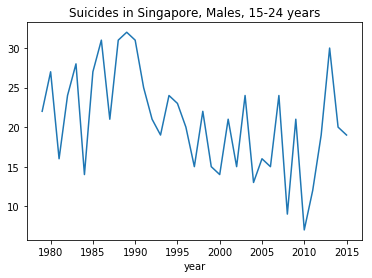

In [79]:
suicides_sgmales_youth=suicides_singapore[(suicides_singapore.sex == 'male') & (suicides_singapore.age == "15-24 years")]
suicides_sgmales_youth.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males, 15-24 years")

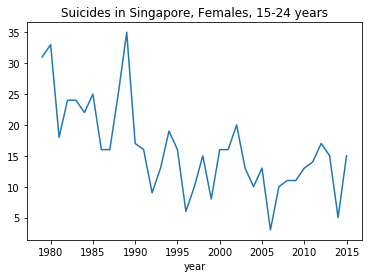

In [82]:
suicides_sgfemales_youth=suicides_singapore[(suicides_singapore.sex == 'female') & (suicides_singapore.age == "15-24 years")]
suicides_sgfemales_youth.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Females, 15-24 years")

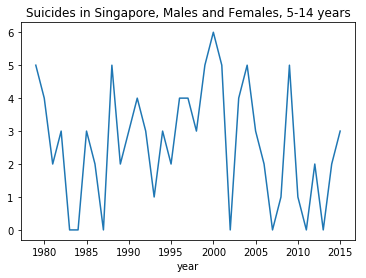

In [89]:
suicides_singapore[suicides_singapore['age'] == "5-14 years"].groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males and Females, 5-14 years")

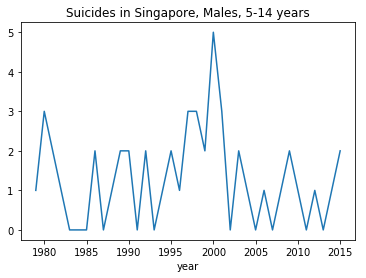

In [98]:
suicides_singapore_sgmales_kids=suicides_singapore[(suicides_singapore.sex == 'male') & (suicides_singapore.age == "5-14 years")]
suicides_singapore_sgmales_kids.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Males, 5-14 years")

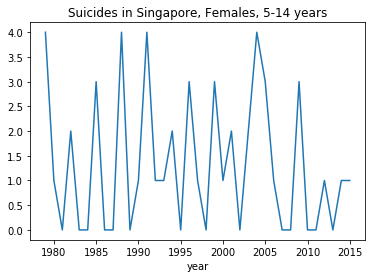

In [99]:
suicides_singapore_sgfemales_kids=suicides_singapore[(suicides_singapore.sex == 'female') & (suicides_singapore.age == "5-14 years")]
suicides_singapore_sgfemales_kids.groupby("year").suicides_no.sum().plot(kind="line", title="Suicides in Singapore, Females, 5-14 years")

# Rough Work


In [87]:
suicides_singapore[(suicides_singapore.sex == 'male') & (suicides_singapore.age == "35-54 years")]



,country,year,sex,age,suicides_no,population,suicides_pc,"(35172, 35616)"
35180,Singapore,1979,male,35-54 years,29.0,237400.0,0.012216,0
35192,Singapore,1980,male,35-54 years,29.0,238500.0,0.012159,0
35204,Singapore,1981,male,35-54 years,26.0,244400.0,0.010638,0
35216,Singapore,1982,male,35-54 years,30.0,256100.0,0.011714,0
35228,Singapore,1983,male,35-54 years,41.0,267600.0,0.015321,0
35240,Singapore,1984,male,35-54 years,39.0,280000.0,0.013929,0
35252,Singapore,1985,male,35-54 years,49.0,292500.0,0.016752,0
35264,Singapore,1986,male,35-54 years,54.0,304500.0,0.017734,0
35276,Singapore,1987,male,35-54 years,43.0,318100.0,0.013518,0
35288,Singapore,1988,male,35-54 years,63.0,319100.0,0.019743,0


In [8]:
suicides_singapore[(suicides_singapore.sex == 'female') & (suicides_singapore.age == "35-54 years")]

,country,year,sex,age,suicides_no,population
35174,Singapore,1979,female,35-54 years,20.0,227100.0
35186,Singapore,1980,female,35-54 years,23.0,229200.0
35198,Singapore,1981,female,35-54 years,15.0,235700.0
35210,Singapore,1982,female,35-54 years,17.0,248300.0
35222,Singapore,1983,female,35-54 years,17.0,259900.0
35234,Singapore,1984,female,35-54 years,18.0,272500.0
35246,Singapore,1985,female,35-54 years,27.0,285200.0
35258,Singapore,1986,female,35-54 years,34.0,297800.0
35270,Singapore,1987,female,35-54 years,33.0,311000.0
35282,Singapore,1988,female,35-54 years,34.0,314300.0


In [94]:
suicides_singapore[suicides_singapore['age']=="5-14 years"].suicides_no

35175    4.0
35181    1.0
35187    1.0
35193    3.0
35199    0.0
35205    2.0
35211    2.0
35217    1.0
35223    0.0
35229    0.0
35235    0.0
35241    0.0
35247    3.0
35253    0.0
35259    0.0
35265    2.0
35271    0.0
35277    0.0
35283    4.0
35289    1.0
35295    0.0
35301    2.0
35307    1.0
35313    2.0
35319    4.0
35325    0.0
35331    1.0
35337    2.0
35343    1.0
35349    0.0
        ... 
35439    2.0
35445    3.0
35451    0.0
35457    0.0
35463    2.0
35469    2.0
35475    4.0
35481    1.0
35487    3.0
35493    0.0
35499    1.0
35505    1.0
35511    0.0
35517    0.0
35523    0.0
35529    1.0
35535    3.0
35541    2.0
35547    0.0
35553    1.0
35559    0.0
35565    0.0
35571    1.0
35577    1.0
35583    0.0
35589    0.0
35595    1.0
35601    1.0
35607    1.0
35613    2.0
Name: suicides_no, Length: 74, dtype: float64

In [95]:
suicides_singapore[(suicides_singapore.sex == 'male') & (suicides_singapore.age == "5-14 years")]


,country,year,sex,age,suicides_no,population
35181,Singapore,1979,male,5-14 years,1.0,243500.0
35193,Singapore,1980,male,5-14 years,3.0,236700.0
35205,Singapore,1981,male,5-14 years,2.0,230300.0
35217,Singapore,1982,male,5-14 years,1.0,226100.0
35229,Singapore,1983,male,5-14 years,0.0,221100.0
35241,Singapore,1984,male,5-14 years,0.0,218900.0
35253,Singapore,1985,male,5-14 years,0.0,215900.0
35265,Singapore,1986,male,5-14 years,2.0,213700.0
35277,Singapore,1987,male,5-14 years,0.0,211300.0
35289,Singapore,1988,male,5-14 years,1.0,208600.0
